In [ ]:
"""
11/23
Purpose: To analyze the fashion dataset using tree based methods

"""

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
#!git clone https://github.com/celiibrendan/fashion-mnist.git

In [6]:
from os import sys
sys.path.append("/fashion-mnist/utils/")
sys.path.append("../../../machine_learning_tools/")

In [7]:
import sklearn_models as sklm
import sklearn_utils as sklu
import numpy_ml as nu
import general_utils as gu

# loads the fashion dataset

In [8]:
import mnist_reader
X_train, y_train = mnist_reader.load_mnist('/fashion-mnist/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('/fashion-mnist/data/fashion', kind='t10k')

In [9]:
X_train.shape

(60000, 784)

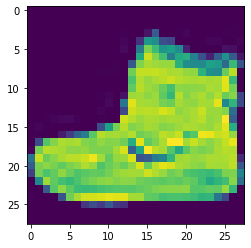

In [10]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0].reshape(28,28))

# Part D: Trying to Tune Models for Accuracy (Bagging)

In [11]:
 """
Purpose:  
Accuracy. Now properly tune each approach and compare and contrast the test accuracy of each
method. Which performs best? Why? What hyperparameters led to the best test error? How
long did each approach take to train? (Note: If you did the Deep Learning problem, also compare
your accuracy and timing to that of the Deep Learning methods above.)

Pseudocode: 
0) Determine all parameters we want to set or inspect over and define
1) Define the RandomizedSearchCV for the models
2) Run the RandomizedSearchCV: 
- record the testing error
- record the time it took
3) Compare the 

"""


'\nPurpose:  \nAccuracy. Now properly tune each approach and compare and contrast the test accuracy of each\nmethod. Which performs best? Why? What hyperparameters led to the best test error? How\nlong did each approach take to train? (Note: If you did the Deep Learning problem, also compare\nyour accuracy and timing to that of the Deep Learning methods above.)\n\nPseudocode: \n0) Determine all parameters we want to set or inspect over and define\n1) Define the RandomizedSearchCV for the models\n2) Run the RandomizedSearchCV: \n- record the testing error\n- record the time it took\n3) Compare the \n\n'

In [13]:
import numpy as np
param_dict = dict(
    n_estimators = np.arange(20,30,2),
    max_features = np.linspace(0.2,0.6,20),
)

clf = sklm.BaggingClassifier()

param_dict

{'n_estimators': array([20, 22, 24, 26, 28]),
 'max_features': array([0.2       , 0.22105263, 0.24210526, 0.26315789, 0.28421053,
        0.30526316, 0.32631579, 0.34736842, 0.36842105, 0.38947368,
        0.41052632, 0.43157895, 0.45263158, 0.47368421, 0.49473684,
        0.51578947, 0.53684211, 0.55789474, 0.57894737, 0.6       ])}

In [14]:
import hyperparameters_ml as hml
best_param, cv_results = hml.best_hyperparams_RandomizedSearchCV(
    clf,
    parameter_dict=param_dict,
    X = X_train,
    y = y_train,
    n_iter_search=10,
    verbose = True
)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.2min finished
[Parallel(n_jobs=1)]: Us

RandomizedSearchCV took 7774.25 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.876 (std: 0.003)
Parameters: {'n_estimators': 28, 'max_features': 0.26315789473684215}

Model with rank: 2
Mean validation score: 0.876 (std: 0.004)
Parameters: {'n_estimators': 26, 'max_features': 0.34736842105263155}

Model with rank: 3
Mean validation score: 0.875 (std: 0.004)
Parameters: {'n_estimators': 28, 'max_features': 0.5789473684210527}



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.8min finished


In [15]:
print(best_param)

{'n_estimators': 28, 'max_features': 0.26315789473684215}


In [16]:
clf_best = cv_results.best_estimator_
print(f"Accuracy of Best Model on Test Data = {sklu.accuracy(clf_best,X_test,y_test)}")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy of Best Model on Test Data = 0.8724


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


# Visualizing the Results

In [30]:
import visualizations_ml as vml
model_name = "BaggingClassifier"
feature_names =  np.array([f"p{i}" for i in range(clf_best.n_features_in_)])
clf_best.classes_ = [f"{k}" for k in clf_best.classes_]

Using method: impurity_decrease
Time for importances = 0.010101318359375


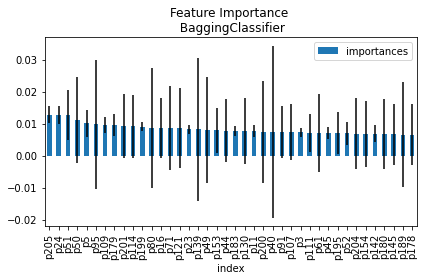

In [32]:
vml.plot_feature_importance(
    clf_best,
    feature_names=feature_names,
    
    title=f"Feature Importance \n {model_name}",
    n_features_to_plot=40,
    
)

In [33]:
f_import = sklm.feature_importances(clf_best,return_std=False)

Using method: impurity_decrease
Time for importances = 0.010179519653320312


In [34]:
import seaborn_ml as sml
sml.heatmap(f_import.reshape(28,28),logscale=True,title=f"{model_name} Pixel Feature Importance")

ValueError: cannot reshape array of size 206 into shape (28,28)